In [4]:
"""
The purpose is to create a classifier to classify the articles into "flood" and "not-flood"
Using the title of the article.
"""

'\nThe purpose is to create a classifier to classify the articles into "flood" and "not-flood"\nUsing the title of the article.\n'

In [5]:
# Import modules
%matplotlib inline
import numpy as np
import pandas as pd
import nltk
import re
from sklearn.model_selection import train_test_split
# Import the SnowballStemmer to perform stemming
from nltk.stem.snowball import SnowballStemmer
# Import TfidfVectorizer to create TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
#Using Naive Bayes to do the prediction
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
df = pd.read_csv('train_test.csv', index_col = 0)

In [7]:
df.head()

,category,body
102,flood,#LatePost #Mudik #Flood
117,flood,Pray for the KM ship to work beautifully\n#pra...
118,flood,#karawangportal #karawang #bandung #responarat...
385,flood,🌊Flash Flood!\n\nLas inundaciones relámpago o ...
395,flood,I think we've had enough rain. 😕\n\nI'm going ...


In [8]:
df_flood = df[df['category'].isin(['flood', 'none'])]

In [9]:
df_flood.rename(columns={'body':'text'}, inplace=True)

In [10]:
#Split the DF
y = df_flood['category']
X = df_flood['text']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
               

In [11]:

stemmer = SnowballStemmer("english")

# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(t) for t in filtered_tokens]
    
    return stems


In [12]:
X_test


620     Next week around this time of day (21:00h in t...
1495    Our flood forecasting service provides automat...
788     You can’t go wrong with a flood time lapse and...
520     The AES Rohwer Research Station is known for h...
1038    San Gabriel River. Can you tell we've had a lo...
                              ...                        
417              #flashflood #hurricaneseason #beprepared
1430    Flash floods in Nepal's Sindhupalchol has clai...
1515    Well, that was yesterday at the beach house.\n...
819     🌊Emergency Water Discharge🌊Tag your fishing fr...
1319    Climate shocks - floods, droughts, locusts, an...
Name: text, Length: 188, dtype: object

In [13]:


# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(max_df=1, max_features=None,
                                 min_df=1, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,5))

    
# Fit and transform the tfidf_vectorizer with the "Title (text column in DF)" 
# to create a vector representation 
tfidf_train = tfidf_vectorizer.fit_transform([x for x in X_train])

tfidf_test = tfidf_vectorizer.transform([x for x in X_test])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [14]:
tfidf_test

<188x73066 sparse matrix of type '<class 'numpy.float64'>'
	with 2035 stored elements in Compressed Sparse Row format>

0.9946808510638298
0.7287234042553191
              precision    recall  f1-score   support

       flood       0.74      0.76      0.75        99
        none       0.72      0.70      0.71        89

    accuracy                           0.73       188
   macro avg       0.73      0.73      0.73       188
weighted avg       0.73      0.73      0.73       188



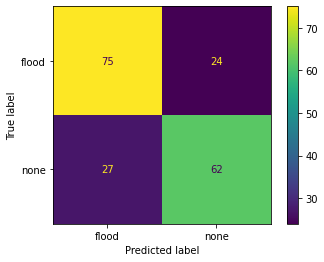

In [15]:


clf = GaussianNB()
clf.fit(tfidf_train.toarray(),y_train)

y_pred = (clf.predict(tfidf_test.toarray()))

print(clf.score(tfidf_train.toarray(),y_train))
print(clf.score(tfidf_test.toarray(),y_test))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, clf.classes_)
disp.plot()
print(classification_report(y_test, y_pred, clf.classes_))


In [16]:
print(cross_val_score(clf, X_train, y_train))

[nan nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'Went and looked at Greensfarm the other day. Haven’t been out that direction in a while so I went to take a look at how high the lake was. 🤷🏻\u200d♂️ #Tacoma #Flooded #EastTexasTacomas #RaptorLiner'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'kaleedionne kyleweather wfaa nbcdfw There’s a cone hugging my car and have never seen the water this high before #June2021 #Monday #flashflood #weather2021'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:53